<a href="https://colab.research.google.com/github/tahae02/Week-3-Advanced-Data-Analysis-Techniques-and-Business-Insights/blob/main/Week_3_Advanced_Data_Analysis_Techniques_and_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook contains all the data cleaning, visualisations and machine learning algorithm

In [41]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

file_path="/content/drive/MyDrive/Colab Notebooks/Uptrail Data Internship Projects /Week 3/Week 3 raw_sales_data (1).xlsx"
df=pd.read_excel(file_path)
print(df)

    Customer_ID    Customer_Name Region  Total_Spend  Purchase_Frequency  \
0           101         John Doe  North         5000                  12   
1           102       Jane Smith  South         3000                   8   
2           103        Sam Brown   East         4500                  10   
3           104    Linda Johnson   West         2500                   5   
4           105      Michael Lee  North         7000                  15   
5           106      Emily Davis  South         3200                   7   
6           107     David Wilson   East         5300                  14   
7           108      Susan White   West         2900                   6   
8           109     Chris Martin  North         6000                  13   
9           110      Anna Taylor  South         3100                   8   
10          111   James Anderson   East         4700                  11   
11          112  Patricia Thomas   West         2600                   5   
12          

In [42]:
df.duplicated().sum() ## means no duplicates

np.int64(0)

## The dataset looks pretty clean  

# Moving on to the Linear Regression modelling

In [43]:
from sklearn.linear_model import LinearRegression
x = df[['Marketing_Spend', 'Seasonality_Index']]
y=df['Total_Spend']

model=LinearRegression()
model.fit(x,y)
print(model.coef_, model.intercept_)

scaler = StandardScaler()

[   2.83396584 -106.26185958] -498.48197343453467


#Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# # Prepare features and target
# X = df[['Marketing_Spend', 'Seasonality_Index']]
# y = df['Total_Spend']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# # Scale features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train model
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # Predict
# y_pred = model.predict(X_test_scaled)

# # Print metrics
# print("Coefficients:", dict(zip(X.columns, model.coef_)))
# print("Intercept:", model.intercept_)
# print("MSE =", mean_squared_error(y_test, y_pred))
# print("R^2 score =", r2_score(y_test, y_pred))

# # Create sub DataFrame for actual vs predicted values
# sub_df = pd.DataFrame({
#     'Test Set Index': list(range(len(y_test))),
#     'Actual Total Spend': y_test.values,
#     'Predicted Total Spend': y_pred.round(2)
# })
# print(sub_df)

# print()
# print(x_test_scaled)
# print(y_pred)


from sklearn.linear_model import LinearRegression
x = df[['Marketing_Spend', 'Seasonality_Index']]
y = df['Total_Spend']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print(model.coef_, model.intercept_)
print("MSE = " + str(mean_squared_error(y_test, y_pred)))
print("R^2 score = " + str(r2_score(y_test, y_pred)))

[1306.7172729   130.13757577] 4175.0
MSE = 178185.61039034853
R^2 score = 0.7932581750365789


plotting the linear regression  

## plotting linear regression

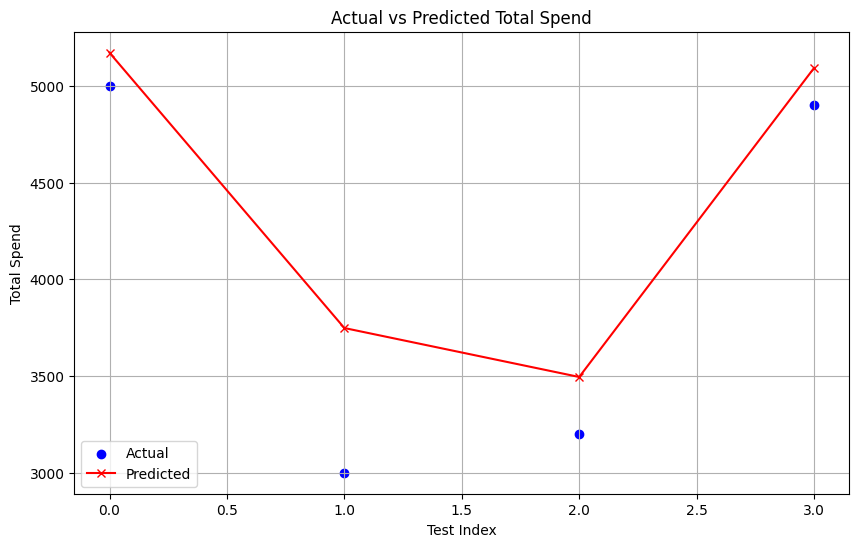

In [50]:
import matplotlib.pyplot as plt

# Plot actual as dots and predicted as line
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Test Index')
plt.ylabel('Total Spend')
plt.title('Actual vs Predicted Total Spend')
plt.legend()
plt.grid(True)
plt.savefig('regression_plot.png')
plt.show()

In [46]:
values = df[["Total_Spend", "Marketing_Spend", "Seasonality_Index"]]
values_sorted = values.sort_values(by="Seasonality_Index", ascending=True)
display(values_sorted)

,Total_Spend,Marketing_Spend,Seasonality_Index
7,2900,1100,0.8
11,2600,1050,0.8
9,3100,1350,0.9
3,2500,1000,0.9
15,2700,1150,0.9
13,3300,1450,1.0
5,3200,1400,1.0
1,3000,1500,1.0
14,4900,2000,1.1
10,4700,1900,1.1


## Cross validation for Linear regression

In [54]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean CV R-squared:", cv_scores.mean().round(2))
print("Standard Deviation CV R-squared:", cv_scores.std().round(2))

Cross-Validation R-squared Scores: [0.87714673 0.90068465 0.91413944 0.97621166 0.96727438]
Mean CV R-squared: 0.93
Standard Deviation CV R-squared: 0.04


#Logistic regression

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00         2
   Yes Churn       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Standard Deviation CV Accuracy: 0.0


,Test Index,Actual Churn,Predicted Churn
0,0,0,0
1,1,1,1
2,2,1,1
3,3,0,0


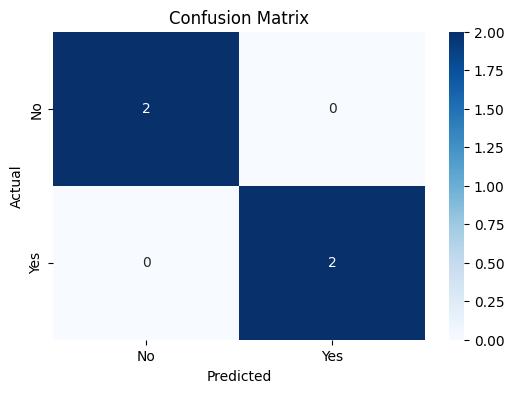

In [61]:
# Prepare features and target
x = df[['Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']]
x = pd.concat([x, pd.get_dummies(df['Region'], prefix='Region', drop_first=True)], axis=1)
y = df['Churned'].map({'Yes': 1, 'No': 0})

# Split data with test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

# Predict
y_pred = model.predict(x_test_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Churn', 'Yes Churn']))

# Cross-validation
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean().round(2))
print("Standard Deviation CV Accuracy:", cv_scores.std().round(2))

# Create table for actual vs predicted
sub_df = pd.DataFrame({
    'Test Index': range(len(y_test)),
    'Actual Churn': y_test.values,
    'Predicted Churn': y_pred
})
display(sub_df)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()

# Time series forecasting (ARIMA)
predicting future monthly sales

<ipython-input-63-922503660>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxim

,Month,Actual Total Spend,Forecasted Total Spend
0,2025-01-31,5500.0,NaN
1,2025-02-28,3300.0,NaN
2,2025-03-31,4900.0,NaN
3,2025-04-30,2700.0,NaN
4,2025-05-31,NaN,5029.20
5,2025-06-30,NaN,2707.35
6,2025-07-31,NaN,5021.87
7,2025-08-31,NaN,2714.66
8,2025-09-30,NaN,5014.59
9,2025-10-31,NaN,2721.91


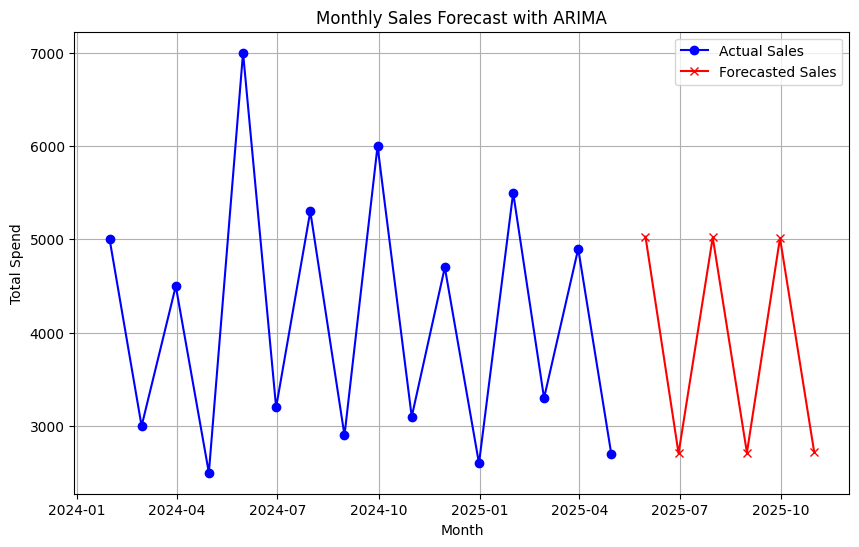

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate Total_Spend by Region and assign synthetic months
df['Month'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
monthly_sales = df.groupby('Month')['Total_Spend'].sum().reset_index()
monthly_sales.set_index('Month', inplace=True)

# Fit ARIMA model
model = ARIMA(monthly_sales['Total_Spend'], order=(1,1,1))
fit = model.fit()

# Forecast 6 future months
forecast = fit.forecast(steps=6)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
forecast_df = pd.DataFrame({'Forecasted Total Spend': forecast.round(2)}, index=forecast_index)

# Create table for actual and forecasted sales
actual_df = monthly_sales.tail(4).copy()
actual_df.columns = ['Actual Total Spend']
combined_df = pd.concat([actual_df, forecast_df], axis=0)
combined_df.reset_index(inplace=True)
combined_df.columns = ['Month', 'Actual Total Spend', 'Forecasted Total Spend']
display(combined_df)

# Plot time series and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total_Spend'], label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red', marker='x')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Monthly Sales Forecast with ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# ANOVA

In [48]:
from scipy.stats import f_oneway
region_1 = df[df['Region']=='North']
region_2=df[df['Region']=='South']
region_3=df[df['Region']=='East']
region_4=df[df['Region']=='West']

